### Automation of Irrigation Systems Using Machine Learning

India is an agrarian country. 70% of the Indian population relies on agriculture for their livelihood.  In recent days due to several factors, it's been hard for farmers to even survive.  So there's a need for a smart way to make agriculture profitable and sustainable. In this, a smart irrigation technique using artificial intelligence is explored.

Import all the necessary libraries to explore, learn the data and to fit models

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import pandas as pd
from sklearn import linear_model

import plotly.graph_objs as go
from plotly.offline import iplot, init_notebook_mode

from datetime import datetime
from IPython.display import HTML
import plotly.express as px

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble.gradient_boosting import GradientBoostingRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


import sklearn.metrics
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble.gradient_boosting import GradientBoostingClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV

C:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.ensemble.gradient_boosting module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.ensemble. Anything that cannot be imported from sklearn.ensemble is now part of the private API.



Load the data with pandas 

In [4]:
data = pd.read_csv('agridata/data.csv')
moisture_days = pd.read_csv('agridata/moisture_days.csv')
moisture_time = pd.read_csv('agridata/moisture_time.csv')

In [5]:
moisture_days.head(10)

,moisture,days
0,1176,1
1,1176,2
2,1176,3
3,1176,4
4,1176,5
5,1125,6
6,1096,7
7,1075,8
8,1056,9
9,1028,10


The moisture data consists of soil moisture data collected over a period of 30 days once a day without adding water to the soil. We can clearly see the trend and the relation of soil moisture with time. Soil moisture declines linearly as the days pass.

In [6]:
#sn.boxplot(y=moisture_days.moisture)

Ploting the graph of moisture against days.

In [7]:
df = moisture_days.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['moisture'],
    df['days'],
], axis=1)
chart_data = chart_data.sort_values(['moisture'])
chart_data = chart_data.rename(columns={'moisture': 'x'})
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['days'], y=chart_data['x'], name='days', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Moisture by days'},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'days'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

We can clearly see how soil moisture depletes over the period. We can see that for the first 5 days the moisture is not reduced. As there's no source of water for the whole period, nothing explains why we are able to see this trend. So we can assume it to be outlier data or we can assume it to be collected not correctly.

Removing the first 4 days of moisture data will give us a better, linear curve

In [8]:
moisture_days = moisture_days.tail(26)

In [9]:
df = moisture_days.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['moisture'],
    df['days'],
], axis=1)
chart_data = chart_data.sort_values(['moisture'])
chart_data = chart_data.rename(columns={'moisture': 'x'})
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['days'], y=chart_data['x'], name='days', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'Moisture by days'},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'days'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

After removing the data of first 4 days the graph is more linear now. Convert the dataframe to numpy array to perform preprocessing. 

In [10]:
y = moisture_days.iloc[:,:-1].values
x = moisture_days.iloc[:,1].values.reshape((-1, 1))

Normalizing the data

In [11]:
moisture_mean,moisture_std = y.mean(), y.std()

In [12]:
yn = y-y.max()

In [13]:
normal_y = (yn-moisture_mean)/moisture_std

splitting the data for training and testing

In [14]:
x_train,x_test, y_train,y_test = train_test_split(x,normal_y,  random_state=1, test_size=0.3)

Here 4 different algorithms are trained for the same data and are compared

In [15]:
linreg = LinearRegression()
rf = RandomForestRegressor()
gboost = GradientBoostingRegressor()
svr = SVR(kernel = 'linear')
models = [linreg,rf, gboost, svr]

for model in models:
    model.fit(x_train,y_train)
    print('train scores for ' + str(model))
    print('r2 score = {}, MAE = {}, MSE = {}'.format(r2_score(model.predict(x_train), y_train), mean_absolute_error(model.predict(x_train), y_train), mean_squared_error(model.predict(x_train), y_train)))
    
    print('test scores for ' + str(model))
    print('r2 score = {}, MAE = {}, MSE = {}'.format(r2_score(model.predict(x_test), y_test), mean_absolute_error(model.predict(x_test), y_test), mean_squared_error(model.predict(x_test), y_test)))
    
    print('***')

train scores for LinearRegression()
r2 score = 0.9898698147042347, MAE = 0.0889824961532639, MSE = 0.010919943901876249
test scores for LinearRegression()
r2 score = 0.9889311004687606, MAE = 0.07324955449836151, MSE = 0.006726241639766852
***
train scores for RandomForestRegressor()
r2 score = 0.9971375193776466, MAE = 0.04464686631582645, MSE = 0.0030429027577350627
test scores for RandomForestRegressor()


<ipython-input-15-7052a96f6a5f>:8: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



r2 score = 0.960658249527599, MAE = 0.12409178015005379, MSE = 0.025032461405614253
***
train scores for GradientBoostingRegressor()
r2 score = 0.9999999989606819, MAE = 2.694245238295719e-05, MSE = 1.1316226199056763e-09
test scores for GradientBoostingRegressor()
r2 score = 0.9590590757152319, MAE = 0.1330477241204257, MSE = 0.027304608363198417
***
train scores for SVR(kernel='linear')
r2 score = 0.9895114168879827, MAE = 0.09419260463527587, MSE = 0.011238473855888222
test scores for SVR(kernel='linear')
r2 score = 0.9885621388375208, MAE = 0.07314981949094268, MSE = 0.006908763687881145
***


C:\Users\suman\anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



We can see that linear regression performing better than others as the data itself is very linear in nature. SVR is also performing well after defining the kernel as linear.

On the other hand we can clearly see the Random forest and Gradient boosting algorithms performing better on training set and lagging in performance on test set. This is because of overfitting. This can be removed by tweeking the parameters. One of the methods to do that is grid search.

Here the GridSearchCV is applied on random forest.

In [16]:
run_gs = True

if run_gs:
    parameter_grid = {
                 'max_depth' : ['none',8,12],
                 'n_estimators': [20,50, 100],
                 'criterion' : ['mse', 'mae'],
                 'max_features': ['sqrt', 'auto', 'log2',None],
                 }
    forest = RandomForestRegressor()

    grid_search = GridSearchCV(forest,
                               scoring='r2',
                               param_grid=parameter_grid,
                               verbose=5,
                              )

    grid_search.fit(x_train, y_train)
    model = grid_search
    parameters = grid_search.best_params_

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __cal

[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mse, max_depth=none, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=lo

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=No

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=N

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=none, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mse, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20, score=0.951, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20, score=0.991, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20, score=0.942, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20, score=0.967, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=20, score=0.858, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimat

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50, score=0.954, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50, score=0.991, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50, score=0.951, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50, score=0.961, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=50, score=0.870, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100, score=0.961, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100, score=0.994, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100, score=0.933, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100, score=0.962, total=   0.2s
[CV] criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=sqrt, n_estimators=100, score=0.883, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=20, score=0.970, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=20, score=0.997, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=20, score=0.939, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=20, score=0.978, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=20, score=0.938, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimato

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=50, score=0.965, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=50, score=0.995, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=50, score=0.943, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=50, score=0.960, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=50, score=0.869, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=100, score=0.961, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=100, score=0.989, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=100, score=0.949, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=100, score=0.969, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=auto, n_estimators=100, score=0.856, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=20, score=0.975, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=20, score=0.984, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=20, score=0.945, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=20, score=0.973, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=20, score=0.805, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimato

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=50, score=0.966, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=50, score=0.987, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=50, score=0.936, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=50, score=0.968, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=50, score=0.891, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=100, score=0.968, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=100, score=0.994, total=   0.2s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=100, score=0.941, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=log2, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=log2, n_estimators=100, score=0.859, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=20, score=0.957, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=20, score=0.983, total=   0.0s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3


[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=20, score=0.939, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=20, score=0.965, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=20, score=0.863, total=   0.0s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=50, score=0.952, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=50, score=0.993, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=50, score=0.953, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=50, score=0.964, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=50, score=0.850, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=100, score=0.952, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=100 .
[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=100, score=0.995, total=   0.1s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=100, score=0.950, total=   0.2s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=100, score=0.976, total=   0.3s
[CV] criterion=mse, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=8, max_features=None, n_estimators=100, score=0.892, total=   0.4s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20, score=0.951, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20, score=0.987, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20, score=0.952, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20, score=0.968, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=20, score=0.932, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_es

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50, score=0.961, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50, score=0.989, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50, score=0.938, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50, score=0.967, total=   0.4s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=50, score=0.813, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100, score=0.967, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100, score=0.992, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100, score=0.938, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100, score=0.965, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=sqrt, n_estimators=100, score=0.872, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=20, score=0.967, total=   0.0s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=20, score=0.993, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=20, score=0.937, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=20, score=0.965, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=20, score=0.758, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=50, score=0.961, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=50, score=0.996, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=50, score=0.932, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=50, score=0.968, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=50, score=0.850, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=100, score=0.960, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=100, score=0.994, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=100, score=0.946, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=100, score=0.965, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=auto, n_estimators=100, score=0.838, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=20, score=0.958, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=20, score=0.990, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=20, score=0.921, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=20, score=0.963, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=20, score=0.847, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=log2, n_e

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3


[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=50, score=0.996, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=50, score=0.941, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=50, score=0.965, total=   0.1s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=50, score=0.876, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=100, score=0.957, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=100, score=0.991, total=   0.2s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=100, score=0.937, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=100, score=0.966, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=log2, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=log2, n_estimators=100, score=0.889, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=20, score=0.957, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=20, score=0.990, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=20 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=20, score=0.930, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=20, score=0.963, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=20, score=0.829, total=   0.0s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=50, score=0.954, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=50, score=0.992, total=   0.1s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=50, score=0.946, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=50, score=0.966, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=50, score=0.881, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=100, score=0.956, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=100, score=0.992, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=100, score=0.944, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=mse, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mse, max_depth=12, max_features=None, n_estimators=100, score=0.854, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sq

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqr

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=sqrt, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_featu

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=aut

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mae, max_depth=none, max_features=auto, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=lo

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=log2, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_feature

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=20 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=20, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=50 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=50, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=Non

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 866, in dispatch_one_batch
    self._dispatch(tasks)
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 784, in _dispatch
    job = self._backend.apply_async(batch, callback=cb

[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.1s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=none, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning:

Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\suman\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 386, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "C:\Users\suman\anaconda3\lib\site-packages\joblib\parallel.py", line 1048, in __call__
    if self.dispatch_one_batch(iterator):
  File "C:\Users\suman\anaconda3\li

[CV]  criterion=mae, max_depth=none, max_features=None, n_estimators=100, score=nan, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20, score=0.980, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20, score=0.991, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20, score=0.933, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20, score=0.975, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=20, score=0.869, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimat

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50, score=0.963, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50, score=0.992, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50, score=0.943, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50, score=0.961, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=50, score=0.820, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100, score=0.965, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100, score=0.993, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100, score=0.945, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100, score=0.966, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=sqrt, n_estimators=100, score=0.869, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=20, score=0.968, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=20, score=0.997, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=20, score=0.911, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=20, score=0.976, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=20, score=0.782, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimato

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=50, score=0.952, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=50, score=0.995, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=50, score=0.939, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=50, score=0.961, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=50, score=0.931, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=100, score=0.965, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=100, score=0.992, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=100, score=0.944, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=100, score=0.966, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=auto, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=auto, n_estimators=100, score=0.881, total=   0.2s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=20, score=0.946, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=20, score=0.989, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=20, score=0.940, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=20, score=0.971, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=20, score=0.898, total=   0.0s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3


[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=50, score=0.967, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=50, score=0.991, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=50 ..


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=50, score=0.935, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=50, score=0.960, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=50, score=0.902, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=100, score=0.961, total=   0.2s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=100, score=0.992, total=   0.2s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=100, score=0.935, total=   0.2s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=log2, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=log2, n_estimators=100, score=0.906, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=20, score=0.970, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=20, score=0.988, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=20, score=0.931, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=20, score=0.962, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=20 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=20, score=0.801, total=   0.0s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimato

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=50, score=0.958, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=50, score=0.991, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=50, score=0.948, total=   0.1s

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().




[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=50, score=0.969, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=50 ..
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=50, score=0.880, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=100, score=0.975, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=100, score=0.990, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=100, score=0.942, total=   0.2s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=100 .
[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=100, score=0.964, total=   0.1s
[CV] criterion=mae, max_depth=8, max_features=None, n_estimators=100 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=8, max_features=None, n_estimators=100, score=0.871, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20, score=0.969, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20, score=0.989, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20, score=0.955, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20, score=0.966, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=20, score=0.867, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_es

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50, score=0.990, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50, score=0.948, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50, score=0.962, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=50, score=0.898, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100, score=0.972, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100, score=0.995, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100, score=0.937, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=sqrt, n_estimators=100, score=0.895, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=20, score=0.978, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=20, score=0.996, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=20 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=20, score=0.931, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=20, score=0.964, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=20, score=0.797, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=50, score=0.958, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=50, score=0.997, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=50, score=0.945, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=50, score=0.958, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=50, score=0.889, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=100, score=0.990, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=100, score=0.942, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=100, score=0.967, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=auto, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=auto, n_estimators=100, score=0.857, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=20, score=0.963, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=20, score=0.994, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=20, score=0.937, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=20, score=0.969, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=20, score=0.838, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=log2, n_e

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=50, score=0.959, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=50, score=0.993, total=   0.2s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=50, score=0.951, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=50, score=0.972, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=50, score=0.833, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=100, score=0.963, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=100, score=0.992, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=100, score=0.942, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=100, score=0.965, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=log2, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=log2, n_estimators=100, score=0.882, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=20, score=0.950, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=20, score=0.990, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=20, score=0.941, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=20, score=0.981, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=20 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=20, score=0.880, total=   0.0s
[CV] criterion=mae, max_depth=12, max_features=None, n_e

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3

[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=50, score=0.954, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=50, score=0.989, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=50, score=0.949, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=50 .


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=50, score=0.965, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=50 .
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=50, score=0.849, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=100, score=0.971, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=100, score=0.997, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=100, score=0.948, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=100 


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=100, score=0.966, total=   0.1s
[CV] criterion=mae, max_depth=12, max_features=None, n_estimators=100 
[CV]  criterion=mae, max_depth=12, max_features=None, n_estimators=100, score=0.891, total=   0.1s


C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:531: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   24.5s finished
C:\Users\suman\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:765: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



In [17]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.964216336820869
Best parameters: {'criterion': 'mse', 'max_depth': 8, 'max_features': 'auto', 'n_estimators': 20}


We can see the best r2 score by grid search is lesser. This is because of lesser amount of data that we have. In the cross validation the GridsearchCV by default divides the data in to 3 parts and applies the algorithms. That means it takes only 10 data points at a time so the r2 score which is a measure of accuracy is reduced. 

We have got the highest r2_score for the test set with Linear Regression that is 0.9915. So for this perticular dataset linear regression is best suited.

In [18]:
moisture_days_model = linreg

In [19]:
charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=x.reshape(-1), y=(linreg.predict(x).reshape(-1)*moisture_std)+moisture_mean+1176, name='predicted moisture', **line_cfg
))
charts.append(go.Scatter(
    x=x.reshape(-1), y=y.reshape(-1), name='actual moisture', 
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'predicted moisture by days'},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'days'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

In [20]:
linreg = LinearRegression()
linreg.fit(y_train, x_train)
days_moisture_model = linreg

In [21]:
moisture_time.head(10)

,Moisture,time
0,350,0.0
1,400,1.0
2,450,1.8
3,500,2.5
4,550,3.2
5,600,4.0
6,650,5.0
7,700,6.0
8,750,6.7
9,800,7.6


The moisture time data consists of soil moisture data collected over a period of 16 mins since the pump is switched on. We can see at the beginning the moisture content in the soil was 350 mg/L and when the pump is switched on the moisture content starts raising

Moisture at the beginning is subtracted from the moisture data.

In [22]:
df = moisture_time.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['Moisture'] - df['Moisture'][0],
    df['time'],
], axis=1)
chart_data = chart_data.sort_values(['Moisture'])
chart_data = chart_data.rename(columns={'Moisture': 'x'})
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['time'], y=chart_data['x'], name='time', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'moisture by time'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'time (seconds)'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

In [23]:
x = moisture_time.iloc[:,:-1].values - moisture_time.Moisture[0]
y = moisture_time.iloc[:,1].values

Normalizing the data

In [24]:
moisture_time_mean,moisture_time_std = x.mean(), x.std()
normal_x = (x-moisture_time_mean)/moisture_time_std

In [25]:
x_train,x_test, y_train,y_test = train_test_split(normal_x,y,  random_state=1, test_size=0.3)

In [26]:
linreg = LinearRegression(normalize=True, )
rf = RandomForestRegressor()
gboost = GradientBoostingRegressor()
svr = SVR(kernel = 'linear')
models = [linreg,rf, gboost, svr]

for model in models:
    model.fit(x_train,y_train)
    print('train scores for ' + str(model))
    print('r2 score = {}, MAE = {}, MSE = {}'.format(r2_score(model.predict(x_train), y_train), mean_absolute_error(model.predict(x_train), y_train), mean_squared_error(model.predict(x_train), y_train)))
    print('test scores for ' + str(model))
    print('r2 score = {}, MAE = {}, MSE = {}'.format(r2_score(model.predict(x_test), y_test), mean_absolute_error(model.predict(x_test), y_test), mean_squared_error(model.predict(x_test), y_test)))
    
    print('***')

train scores for LinearRegression(normalize=True)
r2 score = 0.9911630629466498, MAE = 0.41978571428571426, MSE = 0.22128214285714287
test scores for LinearRegression(normalize=True)
r2 score = 0.997623874464666, MAE = 0.1643333333333329, MSE = 0.042669707482992945
***
train scores for RandomForestRegressor()
r2 score = 0.9951473479727293, MAE = 0.2558333333333327, MSE = 0.11399299999999918
test scores for RandomForestRegressor()
r2 score = 0.9697592172604401, MAE = 0.5329999999999996, MSE = 0.5199673333333299
***
train scores for GradientBoostingRegressor()
r2 score = 0.9999999990538236, MAE = 0.0001249453063819506, MSE = 2.3900735682281878e-08
test scores for GradientBoostingRegressor()
r2 score = 0.948879353700044, MAE = 0.9666405853366906, MSE = 0.9999385843399032
***
train scores for SVR(kernel='linear')
r2 score = 0.9735650143273525, MAE = 0.46136364857125, MSE = 0.5393319607395098
test scores for SVR(kernel='linear')
r2 score = 0.9863278457869072, MAE = 0.2984848440450477, MSE =

We can see that linear regression performing better than others as the data itself is very linear in nature. SVR is also performing well after defining the kernel as linear.

We have got the highest r2_score for the test set with Linear Regression that is 0.997. So for this perticular dataset linear regression is best suited.

In [27]:
df = moisture_time.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['Moisture'] - df['Moisture'][0],
    df['time'],
], axis=1)
chart_data = chart_data.sort_values(['Moisture'])
chart_data = chart_data.rename(columns={'Moisture': 'x'})
chart_data = chart_data.dropna()

charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['time'], y=chart_data['x'], name='actual time', **line_cfg
))

charts.append(go.Scatter(
    x=linreg.predict(normal_x), y=chart_data['x'], name='linear regressor predicted time', **line_cfg
))
charts.append(go.Scatter(
    x=svr.predict(normal_x), y=chart_data['x'], name='svr predicted time', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'moisture by time'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'time (seconds)'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

In [28]:
moisture_time_model = linreg

In [29]:
data.head(10)

,crop,moisture,temp,pump
0,cotton,638,16,1
1,cotton,522,18,1
2,cotton,741,22,1
3,cotton,798,32,1
4,cotton,690,28,1
5,cotton,558,23,1
6,cotton,578,12,1
7,cotton,673,35,1
8,cotton,642,45,1
9,cotton,723,11,1


This file consists of the pump status for different moistures and temperature variations. Their relation is plotted

In [30]:
df = data.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['moisture'],
    df['temp'],
], axis=1)
chart_data = chart_data.sort_values(['moisture'])
chart_data = chart_data.rename(columns={'moisture': 'x'})
chart_data = chart_data.dropna()


charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['temp'], name='temp', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'temp by moisture'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'temperature'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

We can clearly see that temperature and moisture have no relation in the graph.

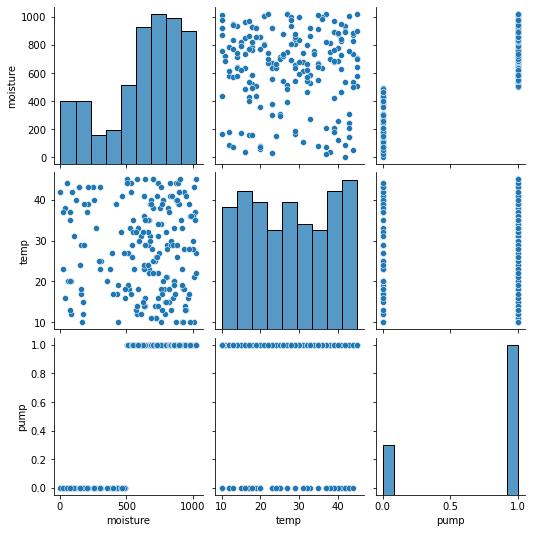

In [31]:
sn.pairplot(data)

In the graph above we can see how pump status and other columns are related. We can see the relation between pump and moisture is a step function in nature.

In [32]:
df = data.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]

chart_data = pd.concat([
    df['moisture'],
    df['pump'],
], axis=1)
chart_data = chart_data.sort_values(['moisture'])
chart_data = chart_data.rename(columns={'moisture': 'x'})
chart_data = chart_data.dropna()


charts = []
line_cfg = {'line': {'shape': 'spline', 'smoothing': 0.3}, 'mode': 'lines'}
charts.append(go.Scatter(
    x=chart_data['x'], y=chart_data['pump'], name='pump', **line_cfg
))
figure = go.Figure(data=charts, layout=go.Layout({
    'legend': {'orientation': 'h'},
    'title': {'text': 'pump status by moisture'},
    'xaxis': {'tickformat': '.0f', 'title': {'text': 'moisture'}},
    'yaxis': {'tickformat': '.0f', 'title': {'text': 'pump status'}}
}))

init_notebook_mode(connected=True)
figure.pop('id', None)
iplot(figure)

In [33]:
x = data.iloc[:,1].values.reshape((-1,1))
y = data.iloc[:,-1].values

splitting the data for training and testin

In [34]:
x,x_test, y,y_test = train_test_split(x,y,  random_state=1, test_size=0.3)

In [35]:
def compute_score(clf, X, y, scoring='accuracy'):
    xval = cross_val_score(clf, X, y, cv = 5, scoring=scoring)
    return np.mean(xval)

In [36]:
logreg = LogisticRegression()
logreg_cv = LogisticRegressionCV()
rf = RandomForestClassifier()
gboost = GradientBoostingClassifier()

models = [logreg, logreg_cv, rf, gboost]

for model in models:
    print('Cross-validation of : {0}'.format(model.__class__))
    score = compute_score(clf=model, X=x, y=y, scoring='accuracy')
    print('CV score = {0}'.format(score))
    print('****')

Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegression'>
CV score = 1.0
****
Cross-validation of : <class 'sklearn.linear_model._logistic.LogisticRegressionCV'>
CV score = 0.9857142857142858
****
Cross-validation of : <class 'sklearn.ensemble._forest.RandomForestClassifier'>
CV score = 1.0
****
Cross-validation of : <class 'sklearn.ensemble._gb.GradientBoostingClassifier'>
CV score = 1.0
****


As we can see all the algorithms are performing very well with cv score of 1

Building the functions for predictions

In [37]:
def predict_moisture(moisture_content, days_to_check):
    '''
    This function takes the moisture content available in the soil to predict the moisture in the
    soil that would be available in the soil after given days.
    
    
    moisture_content takes the value of moisture in g/m3
    days_to_check is the number of days for which we have to predict the moisture content
    '''
    
    a = np.asarray(days_to_check).reshape(-1,1)
    a = (moisture_days_model.predict(a)*moisture_std+moisture_mean) - (moisture_days_model.predict([[0]])*moisture_std+moisture_mean)
    a = a[0][0]
    a = moisture_content + a
    return 'moisture left in the soil after {days:.0f} days is {moisture:.2f}'.format(days= days_to_check,moisture = a)

In [38]:
def predict_moisture2(min_moisture, days_for_next_irrigation):
    a = np.asarray(days_for_next_irrigation).reshape(-1,1)
    a = (moisture_days_model.predict(a)*moisture_std+moisture_mean) - (moisture_days_model.predict([[0]])*moisture_std+moisture_mean)
    a = a[0][0]
    a = min_moisture - a
    return a

In [39]:
def predict_days(moisture_content, min_moisture):
    a = moisture_content - min_moisture
    a = -days_moisture_model.predict([[(a-1176+moisture_mean)/moisture_std]])
    return a[0][0]

In [40]:
def switch_on_pump(moisture_content,moisture_required):
    a = moisture_required - moisture_content
    a = moisture_time_model.predict([[(a-moisture_time_mean)/moisture_time_std]])
    return a[0]

In [41]:
predict_moisture(500, 10)

'moisture left in the soil after 10 days is 101.89'

In [42]:
def pump_master(moisture_content, min_moisture_cutoff = 200, irrigation_frequency=7):
    
    '''
    This function takes the moisture content available in the soil to predict the number of days at which
    soil moisture reduces to minimum cutoff moisture.
    It predicts the moisture required for the specific irrigation frequency.
    It predicts the time in seconds for which pump should be kept on after specific days. 
    '''
    
    a = predict_days(moisture_content = moisture_content, min_moisture = min_moisture_cutoff)
    moisture_required = predict_moisture2(min_moisture_cutoff, irrigation_frequency)
    b = switch_on_pump(moisture_content = 200,moisture_required=moisture_required)
    m = moisture_required + min_moisture_cutoff
    return 'pump should be switched on for {time:.0f} seconds after {days:.0f} days. The moisture content in soil will be {moisture:.0f}'.format(time=b, days=a,moisture=m)

In [43]:
 pump_master(1200, min_moisture_cutoff = 200, irrigation_frequency=7)

'pump should be switched on for 5 seconds after 25 days. The moisture content in soil will be 679'